## Imports

In [1]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Load data

In [2]:
dataset_path = 'dataset/03-splited/train.csv'
df = pd.read_csv(dataset_path)

## Dataset description
In the Boolean features, 1 means "yes" and 2 means "no". values as 97, 98 and 99 are missing data.

- sex: 1 for female and 2 for male.

- age: of the patient.
- classification: covid test findings. Values 1- 3 mean that the patient was diagnosed with covid in different
degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
- patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
- pneumonia: whether the patient already have air sacs inflammation or not.
- pregnancy: whether the patient is pregnant or not.
- diabetes: whether the patient has diabetes or not.
- copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
- asthma: whether the patient has asthma or not.
- inmsupr: whether the patient is immunosuppressed or not.
- hypertension: whether the patient has hypertension or not.
- cardiovascular: whether the patient has heart or blood vessels related disease.
- renal chronic: whether the patient has chronic renal disease or not.
- other disease: whether the patient has other disease or not.
- obesity: whether the patient is obese or not.
- tobacco: whether the patient is a tobacco user. 
- usmr: Indicates whether the patient treated medical units of the first, second or third level.
- medical unit: type of institution of the National Health System that provided the care.
- intubed: whether the patient was connected to the ventilator.
- icu: Indicates whether the patient had been admitted to an Intensive Care Unit.

## Statistics

In [3]:

# Compute basic statistics for all columns in the DataFrame
# This includes count, mean, std, min, 25%, 50%, 75%, max for numeric columns
# and count, unique, top, freq for categorical columns
stats = df.describe(include='all')

missing_counts = df.isnull().sum()

# Add the missing value counts to the statistics DataFrame
stats.loc['missing_count'] = missing_counts

# Add the missing value ratio to the statistics DataFrame
stats.loc['missing_percentage'] = missing_counts / len(df) * 100

# Format the output using tabulate
print(tabulate(stats, headers='keys', tablefmt='grid'))

+--------------------+--------------+----------------+--------------+----------------+--------------+--------------+--------------+------------+--------------+--------------+--------------+--------------+--------------+----------------+-----------------+------------------+--------------+-----------------+--------------+------------------------+--------------+
|                    |        USMER |   MEDICAL_UNIT |          SEX |   PATIENT_TYPE |         DIED |      INTUBED |    PNEUMONIA |        AGE |     PREGNANT |     DIABETES |         COPD |       ASTHMA |      INMSUPR |   HIPERTENSION |   OTHER_DISEASE |   CARDIOVASCULAR |      OBESITY |   RENAL_CHRONIC |      TOBACCO |   CLASIFFICATION_FINAL |          ICU |
+====================+==============+================+==============+================+==============+==============+==============+============+==============+==============+==============+==============+==============+================+=================+==================+===

## View unique values in each column

In [4]:
for col in df.columns:
    unique_vals = df[col].unique()
    unique_vals = set(unique_vals)
    print(f"\nThere are {len(unique_vals)} unique values in column '{col}'")
    print(f"Possible values are: {unique_vals}")


There are 2 unique values in column 'USMER'
Possible values are: {np.int64(1), np.int64(2)}

There are 13 unique values in column 'MEDICAL_UNIT'
Possible values are: {np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13)}

There are 2 unique values in column 'SEX'
Possible values are: {np.int64(1), np.int64(2)}

There are 2 unique values in column 'PATIENT_TYPE'
Possible values are: {np.int64(1), np.int64(2)}

There are 2 unique values in column 'DIED'
Possible values are: {np.int64(1), np.int64(2)}

There are 3 unique values in column 'INTUBED'
Possible values are: {np.float64(1.0), np.float64(2.0), np.float64(nan)}

There are 3 unique values in column 'PNEUMONIA'
Possible values are: {np.float64(1.0), np.float64(2.0), np.float64(nan)}

There are 108 unique values in column 'AGE'
Possible values are: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np

## Histograms

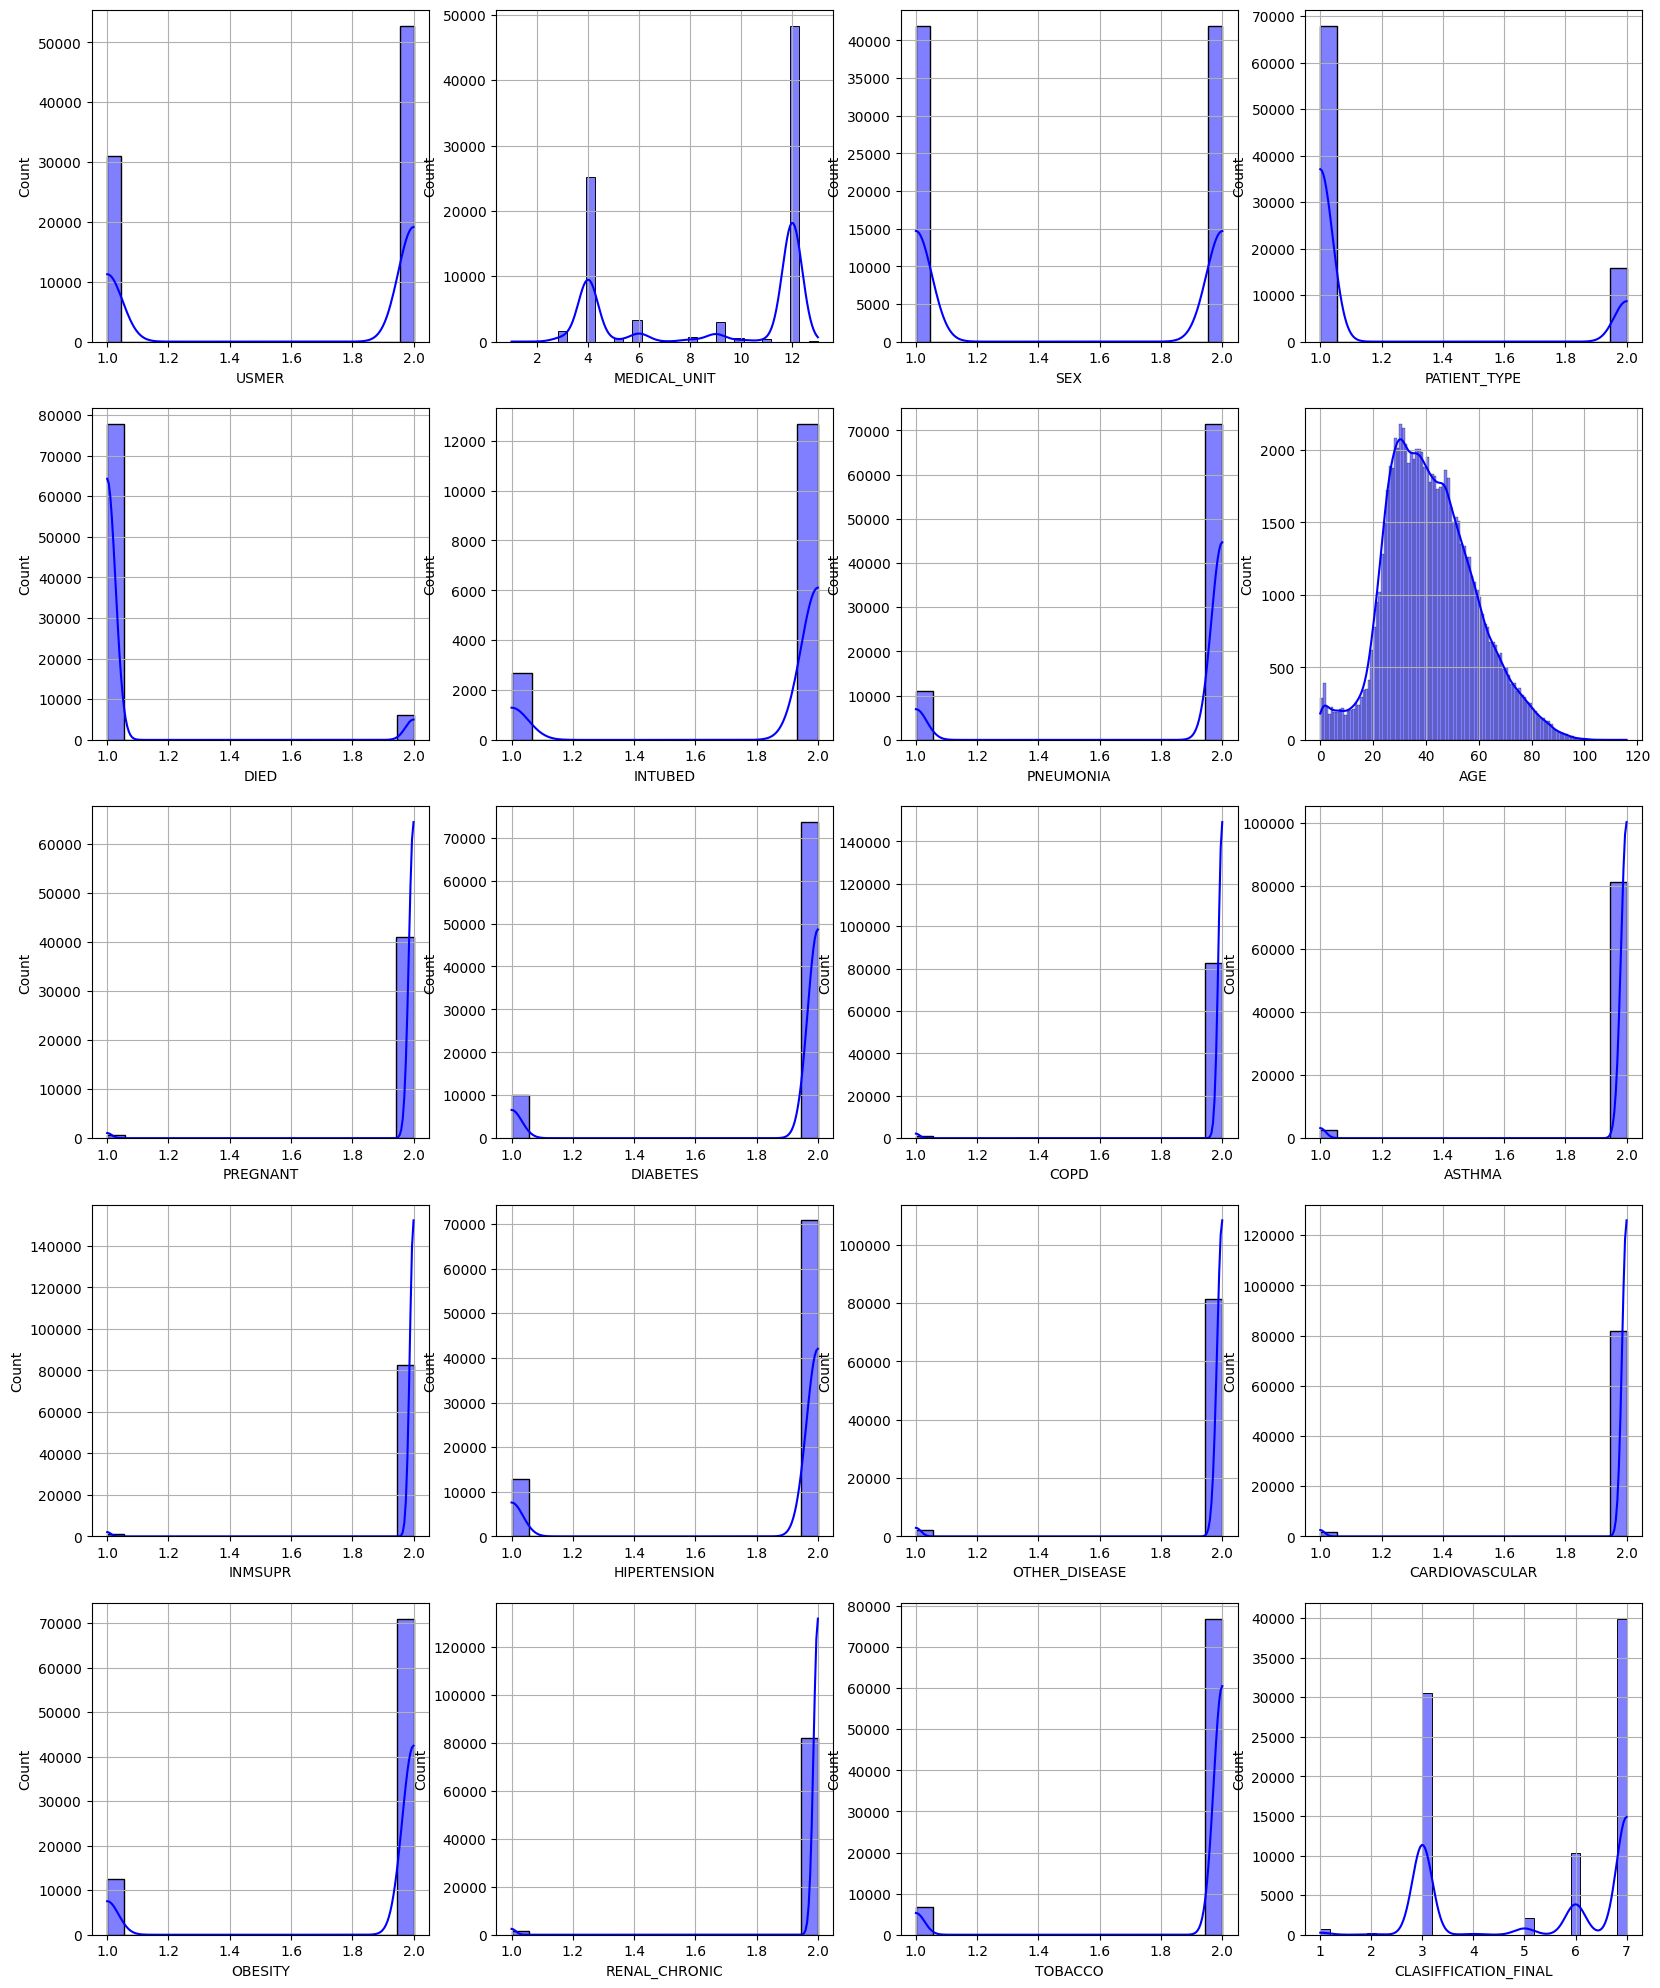

In [5]:
plt.figure(figsize = (20, 25))
# print(len(df.columns))

for i in range(len(df.columns)-1):
    plt.subplot(5, 4, i+1)
    sns.histplot(df.iloc[:, i], color = 'blue', kde=True)
    plt.grid()

plt.show()

## More Visualizations

### Death rate for each classification value

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7')])

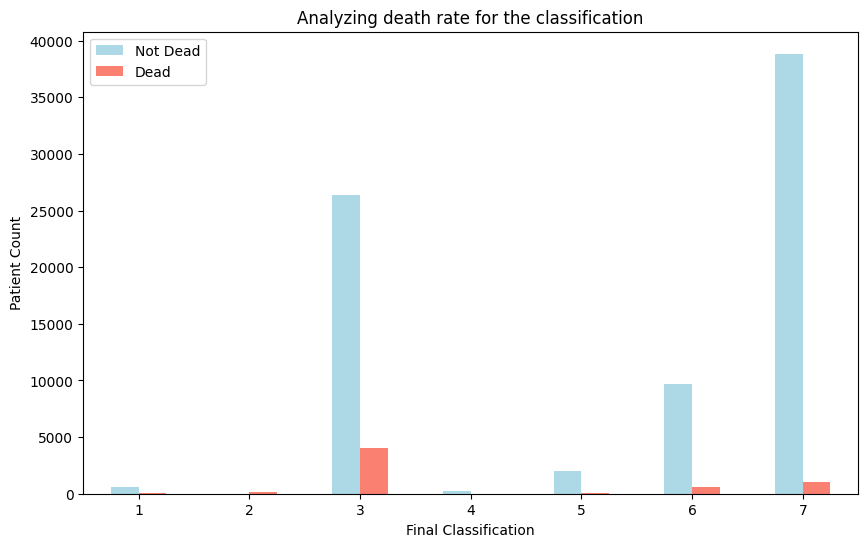

In [6]:
pd.crosstab(df.CLASIFFICATION_FINAL, df.DIED).plot(kind="bar", figsize=(10,6), color=["lightblue", "salmon"])
plt.title("Analyzing death rate for the classification")
plt.xlabel("Final Classification")
plt.ylabel("Patient Count")
plt.legend(["Not Dead", "Dead"])
plt.xticks(rotation=0) 

### Death rate for each gender

(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '2')])

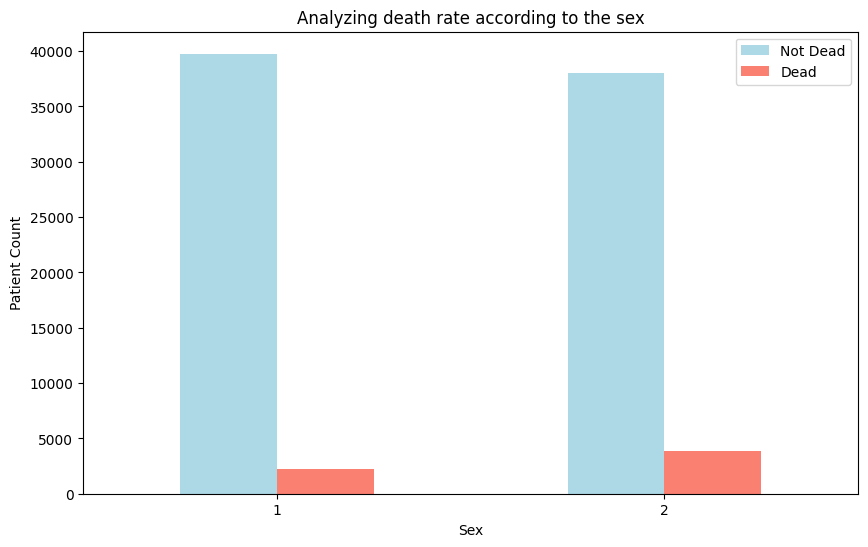

In [7]:
pd.crosstab(df.SEX, df.DIED).plot(kind="bar", figsize=(10,6), color=["lightblue", "salmon"])
plt.title("Analyzing death rate according to the sex")
plt.xlabel("Sex")
plt.ylabel("Patient Count")
plt.legend(["Not Dead", "Dead"])
plt.xticks(rotation=0)

### Death rate for diabetic patients

(array([0, 1]), [Text(0, 0, '1.0'), Text(1, 0, '2.0')])

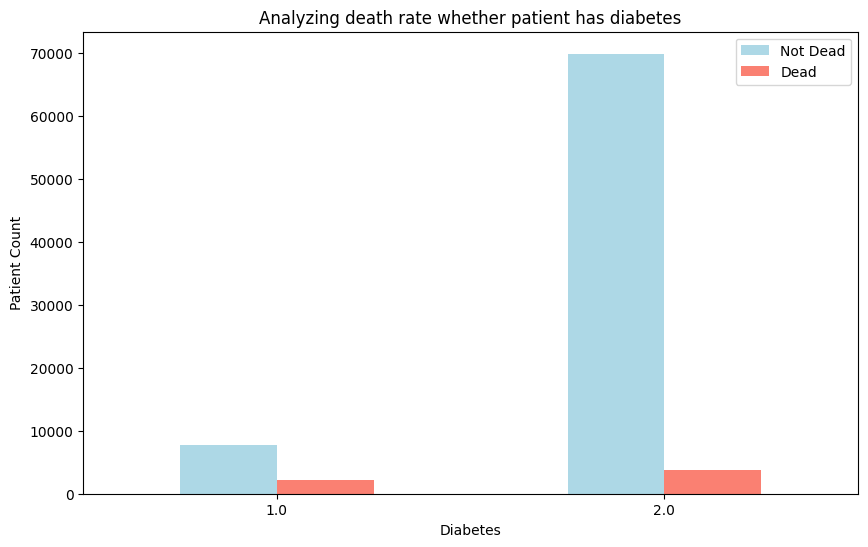

In [8]:
pd.crosstab(df.DIABETES, df.DIED).plot(kind="bar", figsize=(10,6), color=["lightblue", "salmon"])
plt.title("Analyzing death rate whether patient has diabetes")
plt.xlabel("Diabetes")
plt.ylabel("Patient Count")
plt.legend(["Not Dead", "Dead"])
plt.xticks(rotation=0)


### Death rate for other diseases

(array([0, 1]), [Text(0, 0, '1.0'), Text(1, 0, '2.0')])

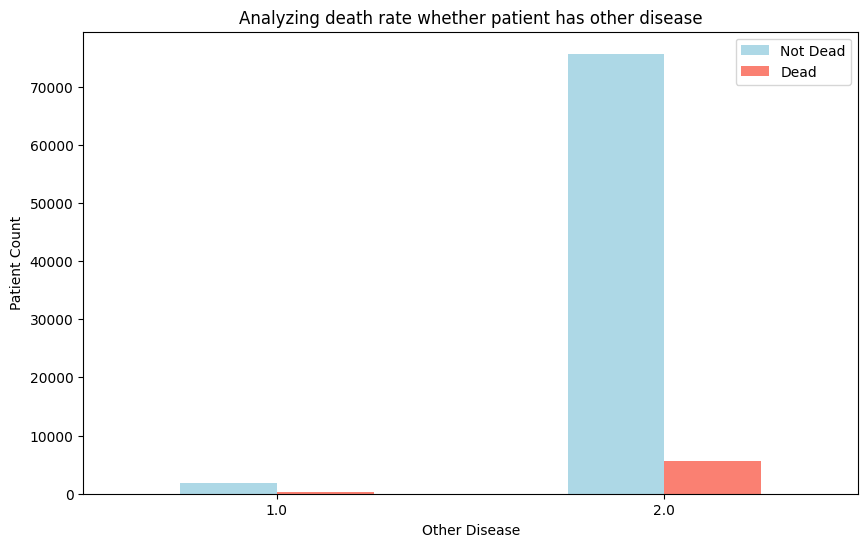

In [9]:
pd.crosstab(df["OTHER_DISEASE"], df.DIED).plot(kind="bar", figsize=(10,6), color=["lightblue", "salmon"])
plt.title("Analyzing death rate whether patient has other disease")
plt.xlabel("Other Disease")
plt.ylabel("Patient Count")
plt.legend(["Not Dead", "Dead"])
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '1.0'), Text(1, 0, '2.0')])

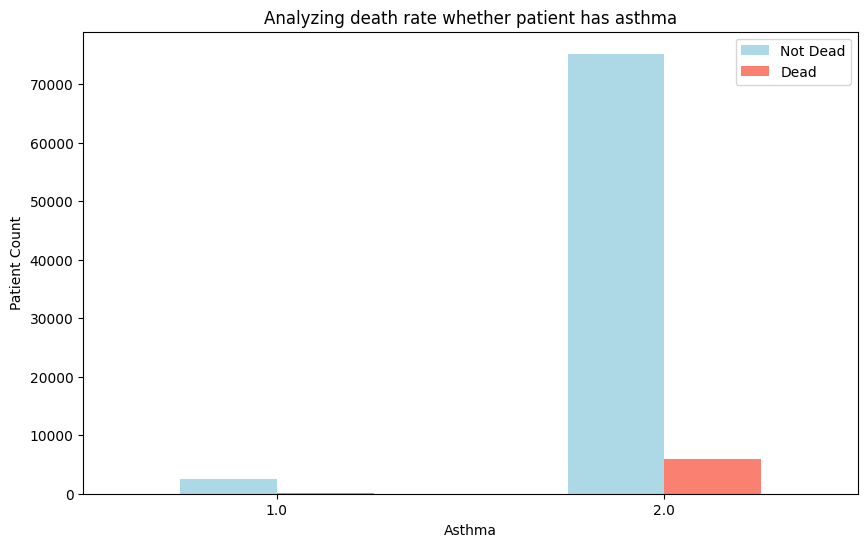

In [10]:
pd.crosstab(df.ASTHMA, df.DIED).plot(kind="bar", figsize=(10,6), color=["lightblue", "salmon"])
plt.title("Analyzing death rate whether patient has asthma")
plt.xlabel("Asthma")
plt.ylabel("Patient Count")
plt.legend(["Not Dead", "Dead"])
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '2')])

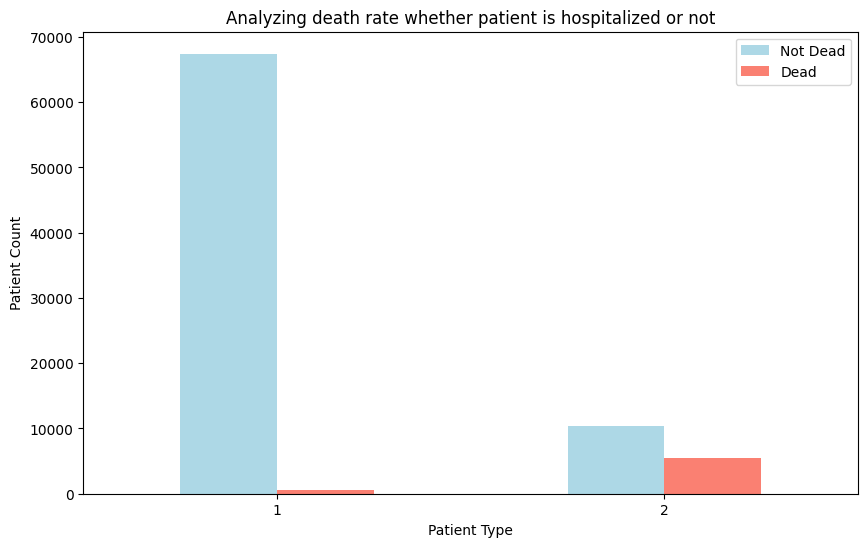

In [11]:
pd.crosstab(df.PATIENT_TYPE, df.DIED).plot(kind="bar", figsize=(10,6), color=["lightblue", "salmon"])
plt.title("Analyzing death rate whether patient is hospitalized or not")
plt.xlabel("Patient Type")
plt.ylabel("Patient Count")
plt.legend(["Not Dead", "Dead"])
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, '1.0'), Text(1, 0, '2.0')])

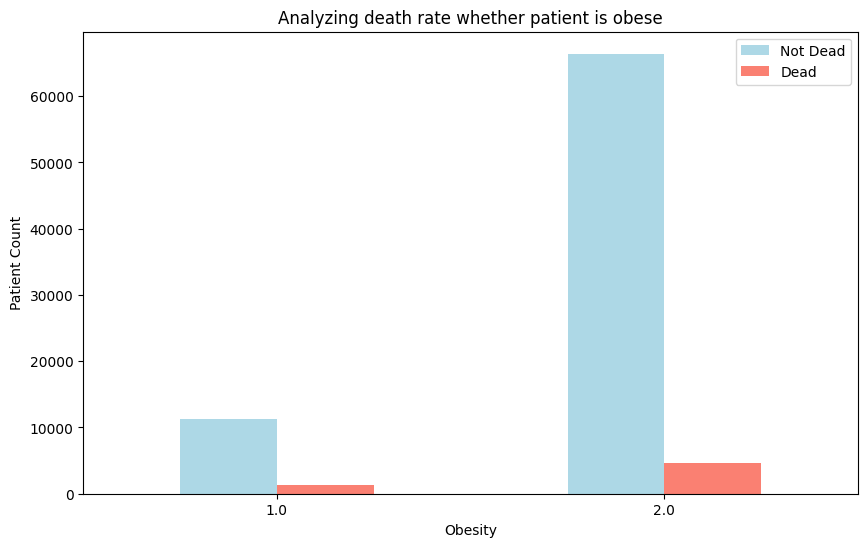

In [12]:
pd.crosstab(df.OBESITY, df.DIED).plot(kind="bar", figsize=(10,6), color=["lightblue", "salmon"])
plt.title("Analyzing death rate whether patient is obese")
plt.xlabel("Obesity")
plt.ylabel("Patient Count")
plt.legend(["Not Dead", "Dead"])
plt.xticks(rotation=0)

## Correlation

<Axes: >

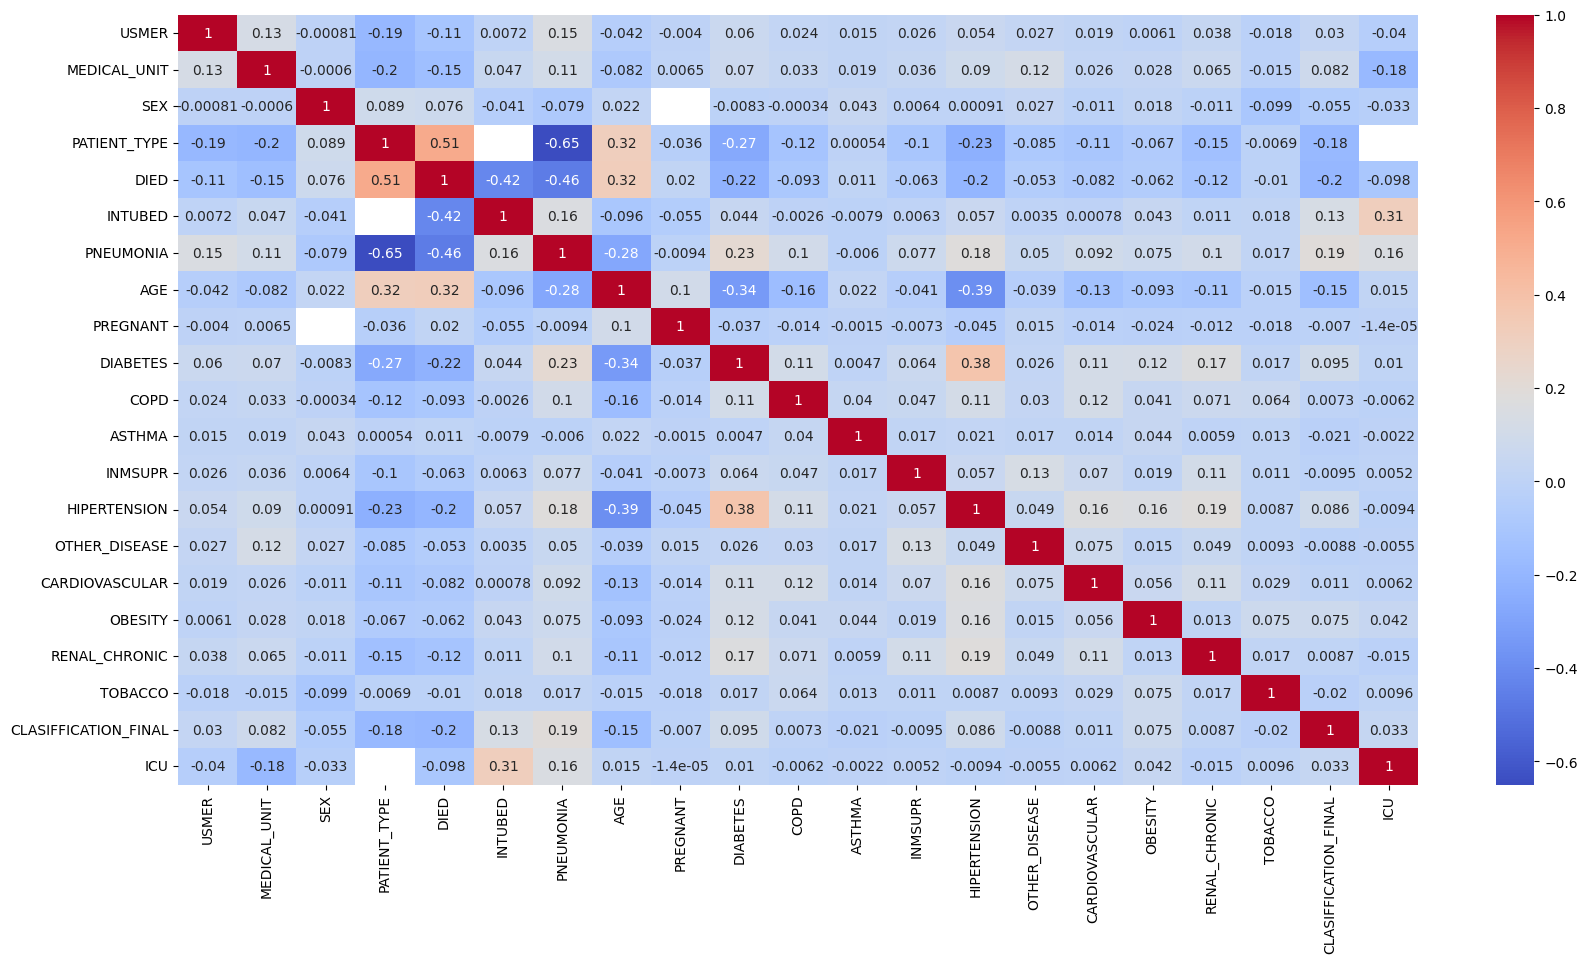

In [13]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")

### Detecting outliers in numerical columns

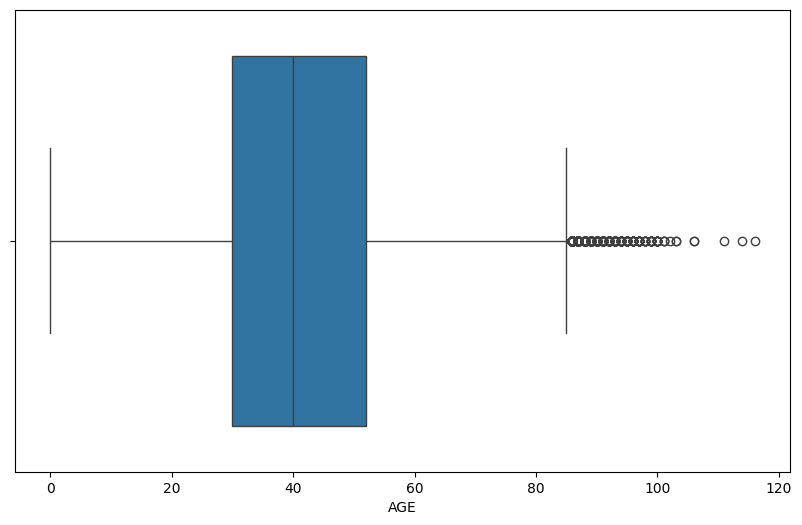

In [14]:
# draw boxplots to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['AGE'])
plt.show()